# clustering

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
unlabeled_iris_df = iris_df.drop(columns=['species'])
unlabeled_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
prediction = kmeans.fit_predict(unlabeled_iris_df)
iris_df['cluster'] = np.array([2, 0, 1])[prediction]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


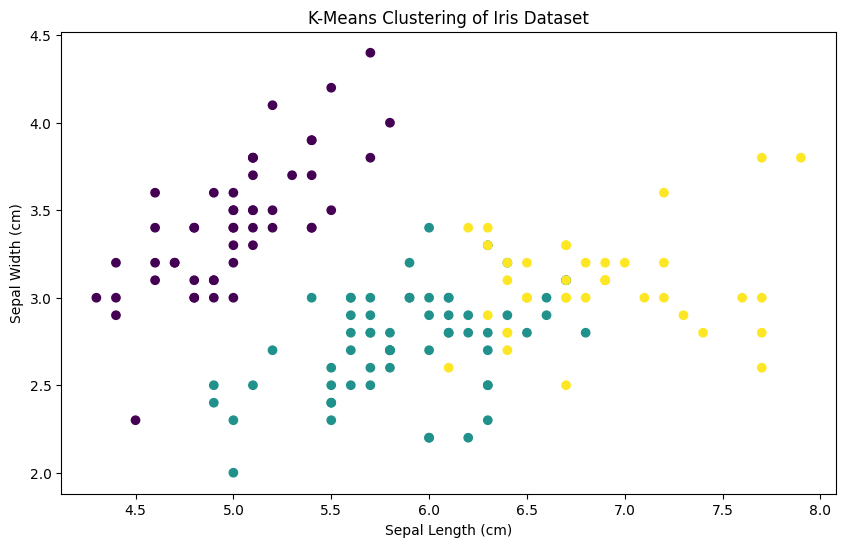

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(unlabeled_iris_df.iloc[:, 0], unlabeled_iris_df.iloc[:, 1], c=iris_df['cluster'], cmap='viridis', marker='o')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

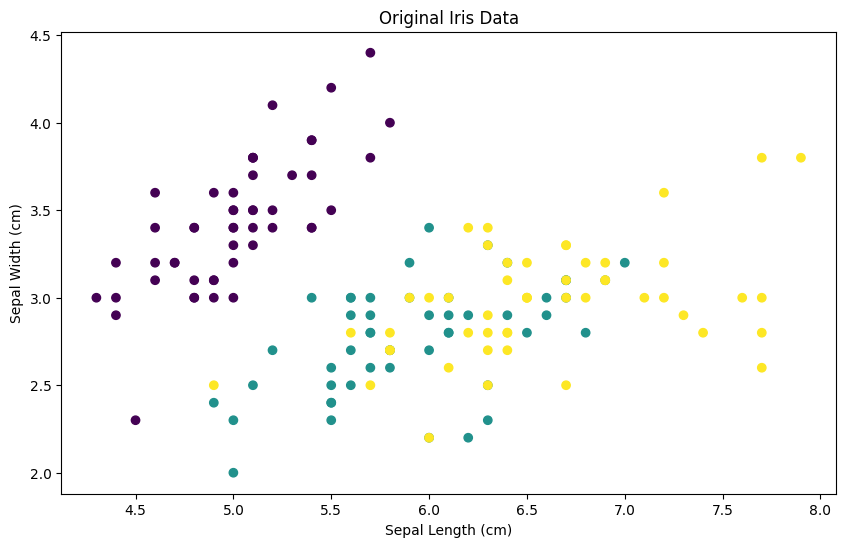

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(unlabeled_iris_df.iloc[:, 0], unlabeled_iris_df.iloc[:, 1], c=iris_df['species'], cmap='viridis', marker='o')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Original Iris Data')
plt.show()

In [12]:
np.count_nonzero(iris_df['species'] - iris_df['cluster'])

17